# Практическая работа №1 
## по предмету "Системы искусственного интеллекта"

В данной практической работе Вы будете работать с базой данных, посвященной баскетболу, которая включает в себя информацию об игроках, играх и командах. 


### Задание 1
Вам необходимо запустить в docker базу данных PostgreSQL и выгрузить туда все данные из файла nba.sqlite, приложенного к лабороторной работе.
Выгрузить данные можно с помощью утилиты pgloader (https://pgloader.readthedocs.io/en/latest/ref/sqlite.html)

### Задание 2

In [2]:
!pip install psycopg2-binary

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.2/1.2 MB 3.0 MB/s eta 0:00:00


Загрузите данные из таблицы . Посмотрите, какие есть типы игр в сезоне (season_type) и количество этих игр.

In [77]:
import psycopg2
import pandas as pd

conn = psycopg2.connect(
    dbname='nba',
    user='admin',
    password='admin',
    host='localhost',
    port=5432
)

df = pd.read_sql('SELECT * from game', conn)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [78]:
df.head(5)

season_id team_id_home team_abbreviation_home           team_name_home  \
0     21946   1610610035                    HUS          Toronto Huskies   
1     21946   1610610034                    BOM        St. Louis Bombers   
2     21946   1610610032                    PRO  Providence Steamrollers   
3     21946   1610610025                    CHS            Chicago Stags   
4     21946   1610610028                    DEF          Detroit Falcons   

      game_id  game_date matchup_home wl_home  min  fgm_home  ...  reb_away  \
0  0024600001 1946-11-01  HUS vs. NYK       L    0      25.0  ...       NaN   
1  0024600003 1946-11-02  BOM vs. PIT       W    0      20.0  ...       NaN   
2  0024600002 1946-11-02  PRO vs. BOS       W    0      21.0  ...       NaN   
3  0024600004 1946-11-02  CHS vs. NYK       W    0      21.0  ...       NaN   
4  0024600005 1946-11-02  DEF vs. WAS       L    0      10.0  ...       NaN   

   ast_away  stl_away  blk_away  tov_away  pf_away  pts_away  plus_minus_away  \
0       NaN       NaN       NaN       NaN      NaN      68.0                2   
1       NaN       NaN       NaN       NaN     25.0      51.0               -5   
2       NaN       NaN       NaN       NaN      NaN      53.0               -6   
3       NaN       NaN       NaN       NaN     22.0      47.0              -16   
4       NaN       NaN       NaN       NaN      NaN      50.0               17   

   video_available_away     season_type  
0                     0  Regular Season  
1                     0  Regular Season  
2                     0  Regular Season  
3                     0  Regular Season  
4                     0  Regular Season  

[5 rows x 55 columns]

In [79]:
df['season_type'].value_counts()

Regular Season    60192
Playoffs           3842
Pre Season         1536
All Star             65
All-Star             63
Name: season_type, dtype: int64

In [80]:
df.replace('All-Star', 'All Star', inplace=True)
df['season_type'].value_counts()

Regular Season    60192
Playoffs           3842
Pre Season         1536
All Star            128
Name: season_type, dtype: int64

Нам понадобятся только регулярные игры сезона и play-off. Отделите эти игры в новый датафрейм.

In [81]:
df = df[(df['season_type'] == 'Regular Season') | (df['season_type'] == 'Playoffs')]
df['season_type'].value_counts()

Regular Season    60192
Playoffs           3842
Name: season_type, dtype: int64

В датах игр выделите только год, убрав день и месяц, в которых была проведена игра

In [82]:
df['game_date_pd'] = pd.to_datetime(df['game_date'])
df['game_year'] = df['game_date_pd'].apply(lambda date: date.year)
df.head(5)

season_id team_id_home team_abbreviation_home           team_name_home  \
0     21946   1610610035                    HUS          Toronto Huskies   
1     21946   1610610034                    BOM        St. Louis Bombers   
2     21946   1610610032                    PRO  Providence Steamrollers   
3     21946   1610610025                    CHS            Chicago Stags   
4     21946   1610610028                    DEF          Detroit Falcons   

      game_id  game_date matchup_home wl_home  min  fgm_home  ...  stl_away  \
0  0024600001 1946-11-01  HUS vs. NYK       L    0      25.0  ...       NaN   
1  0024600003 1946-11-02  BOM vs. PIT       W    0      20.0  ...       NaN   
2  0024600002 1946-11-02  PRO vs. BOS       W    0      21.0  ...       NaN   
3  0024600004 1946-11-02  CHS vs. NYK       W    0      21.0  ...       NaN   
4  0024600005 1946-11-02  DEF vs. WAS       L    0      10.0  ...       NaN   

   blk_away  tov_away  pf_away  pts_away  plus_minus_away  \
0       NaN       NaN      NaN      68.0                2   
1       NaN       NaN     25.0      51.0               -5   
2       NaN       NaN      NaN      53.0               -6   
3       NaN       NaN     22.0      47.0              -16   
4       NaN       NaN      NaN      50.0               17   

   video_available_away     season_type  game_date_pd  game_year  
0                     0  Regular Season    1946-11-01       1946  
1                     0  Regular Season    1946-11-02       1946  
2                     0  Regular Season    1946-11-02       1946  
3                     0  Regular Season    1946-11-02       1946  
4                     0  Regular Season    1946-11-02       1946  

[5 rows x 57 columns]

Нас интересует общий счет, поэтому уберите столбцы pts_home и pts_away, заменив их стобцом с их суммой

In [83]:
df['pts'] = df['pts_home'] + df['pts_away']
df.drop(columns=['pts_home', 'pts_away'], inplace=True)
df.head(5)

season_id team_id_home team_abbreviation_home           team_name_home  \
0     21946   1610610035                    HUS          Toronto Huskies   
1     21946   1610610034                    BOM        St. Louis Bombers   
2     21946   1610610032                    PRO  Providence Steamrollers   
3     21946   1610610025                    CHS            Chicago Stags   
4     21946   1610610028                    DEF          Detroit Falcons   

      game_id  game_date matchup_home wl_home  min  fgm_home  ...  stl_away  \
0  0024600001 1946-11-01  HUS vs. NYK       L    0      25.0  ...       NaN   
1  0024600003 1946-11-02  BOM vs. PIT       W    0      20.0  ...       NaN   
2  0024600002 1946-11-02  PRO vs. BOS       W    0      21.0  ...       NaN   
3  0024600004 1946-11-02  CHS vs. NYK       W    0      21.0  ...       NaN   
4  0024600005 1946-11-02  DEF vs. WAS       L    0      10.0  ...       NaN   

   blk_away  tov_away  pf_away  plus_minus_away  video_available_away  \
0       NaN       NaN      NaN                2                     0   
1       NaN       NaN     25.0               -5                     0   
2       NaN       NaN      NaN               -6                     0   
3       NaN       NaN     22.0              -16                     0   
4       NaN       NaN      NaN               17                     0   

      season_type  game_date_pd  game_year    pts  
0  Regular Season    1946-11-01       1946  134.0  
1  Regular Season    1946-11-02       1946  107.0  
2  Regular Season    1946-11-02       1946  112.0  
3  Regular Season    1946-11-02       1946  110.0  
4  Regular Season    1946-11-02       1946   83.0  

[5 rows x 56 columns]

Постройте график, где по оси Х будет год игр, а по оси Y - среднее количество очков за игру в этом году.

In [84]:
import matplotlib.pyplot as plt

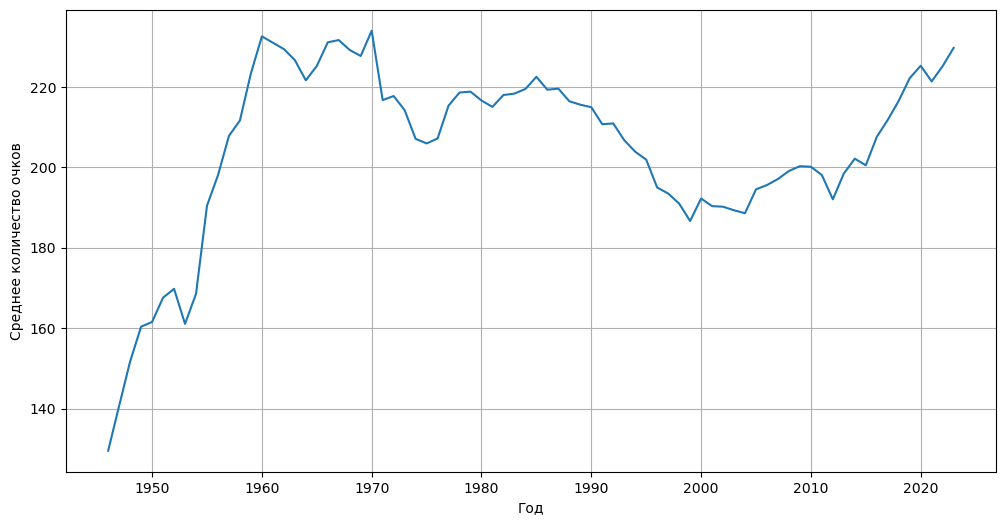

In [85]:
avg_points = df.groupby('game_year')['pts'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(avg_points['game_year'], avg_points['pts'])
plt.xlabel('Год')
plt.ylabel('Среднее количество очков')
plt.grid(True)
plt.show()

### Задание 3

Выполните запрос к таблице draft_history, получив датафрейм.

In [60]:
draft_history = pd.read_sql('SELECT * from draft_history', conn)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [61]:
draft_history.head()

person_id       player_name season  round_number  round_pick  overall_pick  \
0     79299  Clifton McNeeley   1947             1           1             1   
1     78109        Glen Selbo   1947             1           2             2   
2     76649      Eddie Ehlers   1947             1           3             3   
3     79302        Walt Dropo   1947             1           4             4   
4     77048        Dick Holub   1947             1           5             5   

  draft_type     team_id   team_city     team_name team_abbreviation  \
0      Draft  1610610031  Pittsburgh       Ironmen               PIT   
1      Draft  1610610035     Toronto       Huskies               HUS   
2      Draft  1610612738      Boston       Celtics               BOS   
3      Draft  1610610032  Providence  Steamrollers               PRO   
4      Draft  1610612752    New York        Knicks               NYK   

           organization   organization_type player_profile_flag  
0         Texas-El Paso  College/University                   0  
1             Wisconsin  College/University                   1  
2                Purdue  College/University                   1  
3           Connecticut  College/University                   0  
4  Long Island-Brooklyn  College/University                   1

Постройте график, где по оси X будет год, а по оси Y - количество выбранных игроков в этот год (каждая строка в таблице - выбранный игрок).

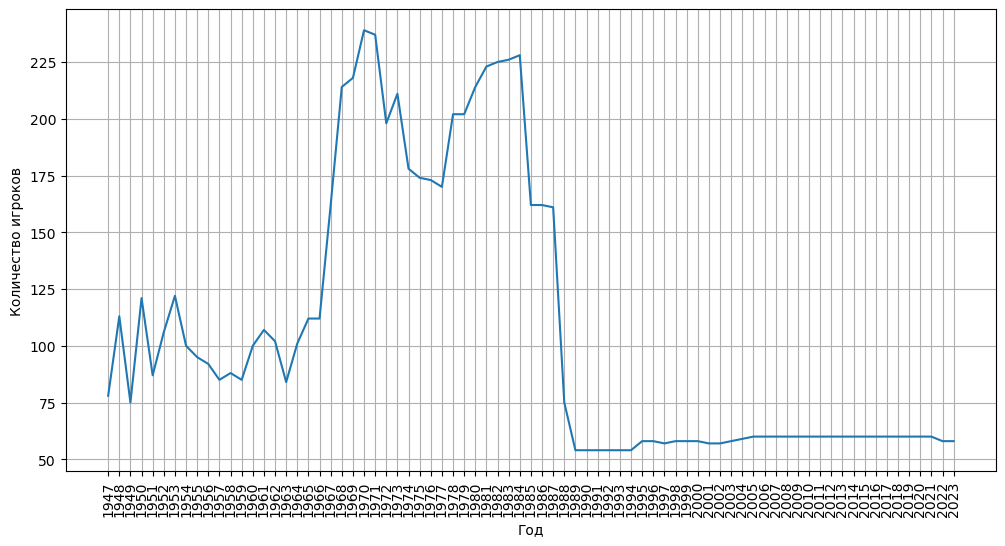

In [62]:
players = draft_history.groupby('season').size().reset_index(name='num_players')

plt.figure(figsize=(12,6))
plt.plot(players['season'], players['num_players'])
plt.xlabel('Год')
plt.ylabel('Количество игроков')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### Задание 4

Необходимо построить график, показывающий топ 10 школ, игроки из которых были выбраны. Для этого вам понадобятся таблицы common_player_info и draft_history.

In [63]:
common_player_info = pd.read_sql('SELECT * from common_player_info', conn)


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [64]:
common_player_info.head()

person_id first_name     last_name   display_first_last  \
0     76001       Alaa     Abdelnaby       Alaa Abdelnaby   
1     76002       Zaid    Abdul-Aziz      Zaid Abdul-Aziz   
2     76003     Kareem  Abdul-Jabbar  Kareem Abdul-Jabbar   
3       949    Shareef   Abdur-Rahim  Shareef Abdur-Rahim   
4     76006     Forest          Able          Forest Able   

  display_last_comma_first  display_fi_last          player_slug  birthdate  \
0          Abdelnaby, Alaa     A. Abdelnaby       alaa-abdelnaby 1968-06-24   
1         Abdul-Aziz, Zaid    Z. Abdul-Aziz      zaid-abdul-aziz 1946-04-07   
2     Abdul-Jabbar, Kareem  K. Abdul-Jabbar  kareem-abdul-jabbar 1947-04-16   
3     Abdur-Rahim, Shareef   S. Abdur-Rahim  shareef-abdur-rahim 1976-12-11   
4             Able, Forest          F. Able          forest-able 1932-07-27   

             school country  ...                   playercode from_year  \
0              Duke     USA  ...       HISTADD_alaa_abdelnaby    1990.0   
1        Iowa State     USA  ...      HISTADD_zaid_abdul-aziz    1968.0   
2              UCLA     USA  ...  HISTADD_kareem_abdul-jabbar    1969.0   
3        California     USA  ...          shareef_abdur-rahim    1996.0   
4  Western Kentucky     USA  ...          HISTADD_frosty_able    1956.0   

  to_year  dleague_flag nba_flag games_played_flag draft_year draft_round  \
0  1994.0             N        Y                 Y       1990           1   
1  1977.0             N        Y                 Y       1968           1   
2  1988.0             N        Y                 Y       1969           1   
3  2007.0             N        Y                 Y       1996           1   
4  1956.0             N        Y                 Y       1956        None   

   draft_number greatest_75_flag  
0            25                N  
1             5                N  
2             1                Y  
3             3                N  
4          None                N  

[5 rows x 33 columns]

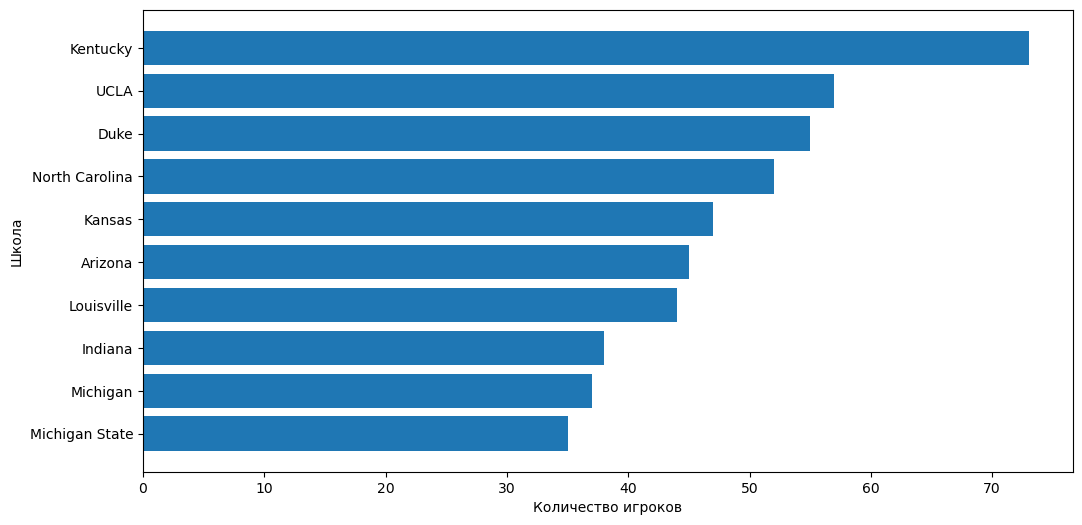

In [73]:
merged = pd.merge(draft_history, common_player_info[['person_id', 'school']], on='person_id', how='left')

school_counts = merged.groupby('school').size().reset_index(name='num_players')

school_counts = school_counts.sort_values(by='num_players').tail(10)

plt.figure(figsize=(12,6))
plt.barh(school_counts['school'], school_counts['num_players'])
plt.xlabel("Количество игроков")
plt.ylabel("Школа")
plt.show()

### Задание 5

Постройте график сравнения выигранных домашних и выездных игр в каждом году. Для этого используйте таблицу game.

In [86]:
df.head()

season_id team_id_home team_abbreviation_home           team_name_home  \
0     21946   1610610035                    HUS          Toronto Huskies   
1     21946   1610610034                    BOM        St. Louis Bombers   
2     21946   1610610032                    PRO  Providence Steamrollers   
3     21946   1610610025                    CHS            Chicago Stags   
4     21946   1610610028                    DEF          Detroit Falcons   

      game_id  game_date matchup_home wl_home  min  fgm_home  ...  stl_away  \
0  0024600001 1946-11-01  HUS vs. NYK       L    0      25.0  ...       NaN   
1  0024600003 1946-11-02  BOM vs. PIT       W    0      20.0  ...       NaN   
2  0024600002 1946-11-02  PRO vs. BOS       W    0      21.0  ...       NaN   
3  0024600004 1946-11-02  CHS vs. NYK       W    0      21.0  ...       NaN   
4  0024600005 1946-11-02  DEF vs. WAS       L    0      10.0  ...       NaN   

   blk_away  tov_away  pf_away  plus_minus_away  video_available_away  \
0       NaN       NaN      NaN                2                     0   
1       NaN       NaN     25.0               -5                     0   
2       NaN       NaN      NaN               -6                     0   
3       NaN       NaN     22.0              -16                     0   
4       NaN       NaN      NaN               17                     0   

      season_type  game_date_pd  game_year    pts  
0  Regular Season    1946-11-01       1946  134.0  
1  Regular Season    1946-11-02       1946  107.0  
2  Regular Season    1946-11-02       1946  112.0  
3  Regular Season    1946-11-02       1946  110.0  
4  Regular Season    1946-11-02       1946   83.0  

[5 rows x 56 columns]

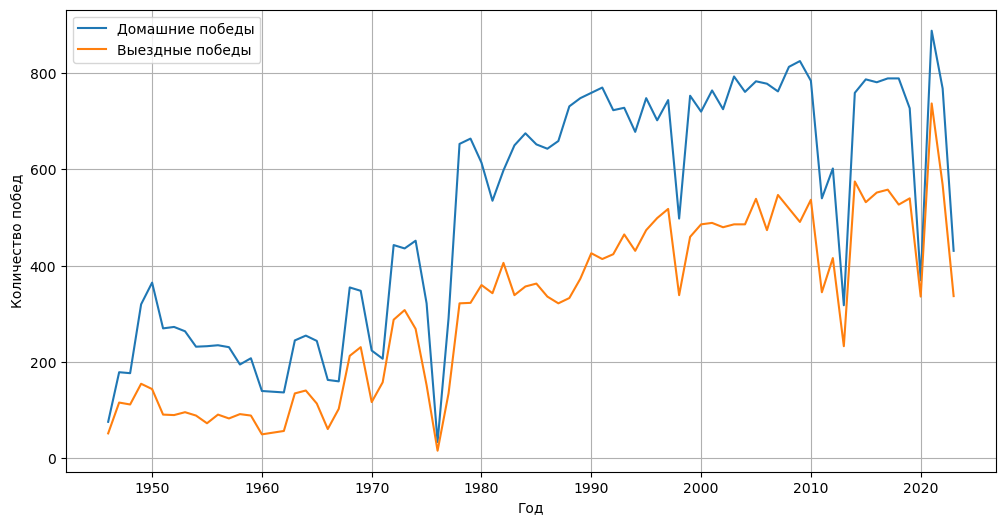

In [90]:

df['wl_away'] = df['wl_home'].map({'W': 'L', 'L': 'W'})

home_wins = df[df['wl_home']=='W'].groupby('game_year').size().reset_index(name='home_wins')
away_wins = df[df['wl_away']=='W'].groupby('game_year').size().reset_index(name='away_wins')

wins = pd.merge(home_wins, away_wins, on='game_year', how='outer')

# строим график
plt.figure(figsize=(12,6))
plt.plot(wins['game_year'], wins['home_wins'], label='Домашние победы')
plt.plot(wins['game_year'], wins['away_wins'], label='Выездные победы')
plt.xlabel("Год")
plt.ylabel("Количество побед")
plt.legend()
plt.grid(True)
plt.show()

### Задание 6

Какова средняя продолжительность карьеры активного игрока NBA? Используйте таблицы common_player_info и player. Активный игрок - это тот, у которого в колонке is_active стоит 1.

In [91]:
player = pd.read_sql('SELECT * from player', conn)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [93]:
display(common_player_info.head())
display(player.head())

person_id first_name     last_name   display_first_last  \
0     76001       Alaa     Abdelnaby       Alaa Abdelnaby   
1     76002       Zaid    Abdul-Aziz      Zaid Abdul-Aziz   
2     76003     Kareem  Abdul-Jabbar  Kareem Abdul-Jabbar   
3       949    Shareef   Abdur-Rahim  Shareef Abdur-Rahim   
4     76006     Forest          Able          Forest Able   

  display_last_comma_first  display_fi_last          player_slug  birthdate  \
0          Abdelnaby, Alaa     A. Abdelnaby       alaa-abdelnaby 1968-06-24   
1         Abdul-Aziz, Zaid    Z. Abdul-Aziz      zaid-abdul-aziz 1946-04-07   
2     Abdul-Jabbar, Kareem  K. Abdul-Jabbar  kareem-abdul-jabbar 1947-04-16   
3     Abdur-Rahim, Shareef   S. Abdur-Rahim  shareef-abdur-rahim 1976-12-11   
4             Able, Forest          F. Able          forest-able 1932-07-27   

             school country  ...                   playercode from_year  \
0              Duke     USA  ...       HISTADD_alaa_abdelnaby    1990.0   
1        Iowa State     USA  ...      HISTADD_zaid_abdul-aziz    1968.0   
2              UCLA     USA  ...  HISTADD_kareem_abdul-jabbar    1969.0   
3        California     USA  ...          shareef_abdur-rahim    1996.0   
4  Western Kentucky     USA  ...          HISTADD_frosty_able    1956.0   

  to_year  dleague_flag nba_flag games_played_flag draft_year draft_round  \
0  1994.0             N        Y                 Y       1990           1   
1  1977.0             N        Y                 Y       1968           1   
2  1988.0             N        Y                 Y       1969           1   
3  2007.0             N        Y                 Y       1996           1   
4  1956.0             N        Y                 Y       1956        None   

   draft_number greatest_75_flag  
0            25                N  
1             5                N  
2             1                Y  
3             3                N  
4          None                N  

[5 rows x 33 columns]

id            full_name first_name     last_name  is_active
0  76001       Alaa Abdelnaby       Alaa     Abdelnaby          0
1  76002      Zaid Abdul-Aziz       Zaid    Abdul-Aziz          0
2  76003  Kareem Abdul-Jabbar     Kareem  Abdul-Jabbar          0
3     51   Mahmoud Abdul-Rauf    Mahmoud    Abdul-Rauf          0
4   1505    Tariq Abdul-Wahad      Tariq   Abdul-Wahad          0

In [101]:
player.rename(columns={'id': 'person_id'}, inplace=True)
merged = pd.merge(player[['person_id', 'is_active']], common_player_info[['person_id', 'from_year', 'to_year']], on='person_id', how='inner')
merged.head()

person_id  is_active  from_year  to_year
0     76001          0     1990.0   1994.0
1     76002          0     1968.0   1977.0
2     76003          0     1969.0   1988.0
3       949          0     1996.0   2007.0
4     76006          0     1956.0   1956.0

In [105]:
merged = merged[merged['is_active'] == 1]
merged['career_len'] = merged['to_year'] - merged['from_year']
merged['career_len'].mean()

5.121428571428571

### Задание 7

Каково соотношение позиций, на которых играют игроки? Используйте таблицу common_player_info.

In [111]:
position_counts = common_player_info['position'].value_counts()
display(position_counts)

Guard             1416
Forward           1306
Center             497
Guard-Forward      134
Forward-Center     112
Center-Forward      68
Forward-Guard       54
                    45
Name: position, dtype: int64

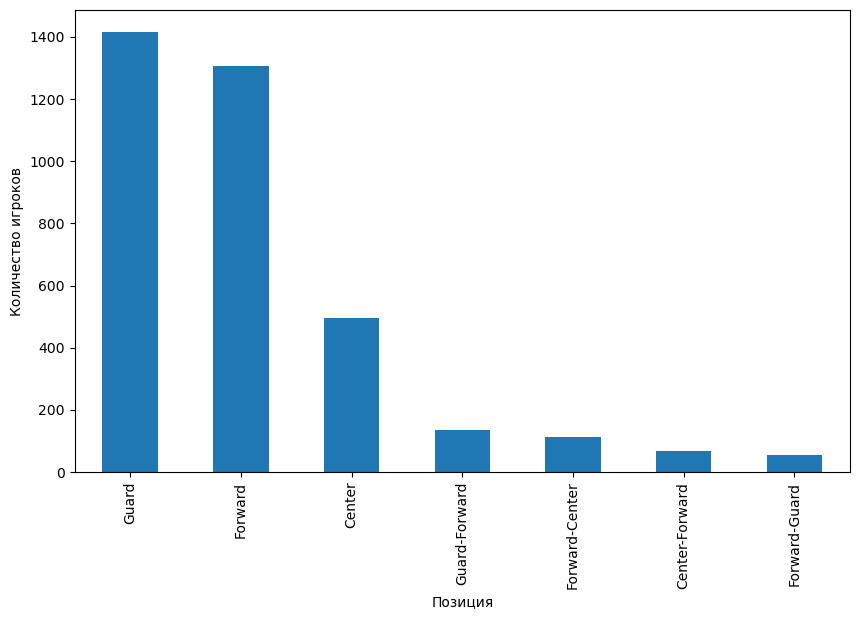

In [113]:
position_counts = position_counts[position_counts.index != '']

plt.figure(figsize=(10,6))
position_counts.plot(kind='bar')
plt.xlabel("Позиция")
plt.ylabel("Количество игроков")
plt.show()